In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import re
import torch
from bertopic import BERTopic
from wordcloud import WordCloud
from transformers import AutoTokenizer, AutoModel

In [20]:
#Import the data from the JSON file
print("Importing data and building DataFrame:")
start_time = time.time()
with open('data/cleanedAggregateData.json', 'r') as f:
    data = json.load(f)
end_time = time.time()
load_time = end_time - start_time
print("Data load time", load_time)
print(data[0])

Importing data and building DataFrame:
Data load time 0.009002447128295898
{'id': 'EJ959619', 'title': 'Can Synchronous Computer-Mediated Communication (CMC) Help Beginning-Level Foreign Language Learners Speak?', 'author': 'Ko, Chao-Jung', 'description': "This study investigated the possibility that initial-level learners may acquire oral skills through synchronous computer-mediated communication (SCMC). Twelve Taiwanese French as a foreign language (FFL) students, divided into three groups, were required to conduct a variety of tasks in one of the three learning environments (video/audio, audio, and face-to-face (f2f)) over 18 weeks. The participants' performance in three oral tests was compared to see if they had developed oral skills in the three environments. The other data such as their online chat records, interview transcriptions, learning journals, and the instructor's observation journal provided further information about how they developed oral skills in their learning envir

In [21]:
#Create dataframe
print("Data loaded, converting to DataFrame")
start_time = time.time()
df = pd.DataFrame(data)
end_time = time.time()
convert_time = end_time - start_time
print("Data successfully converted to DataFrame. Conversion time:", convert_time)

Data loaded, converting to DataFrame
Data successfully converted to DataFrame. Conversion time: 0.004000186920166016


In [23]:
# Load the SciBERT tokenizer and model
docs = df.description.tolist()
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
model = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased')
encoded_docs = [tokenizer.encode(doc, add_special_tokens=True) for doc in docs]

# Convert the encoded documents back to strings
decoded_docs = [tokenizer.decode(doc) for doc in encoded_docs]

# Initialize BERTopic with the SciBERT embedding model
embedding_model = (model, tokenizer)
model = BERTopic(verbose=True, embedding_model=embedding_model)

# Fit the model on the decoded documents
topics, probabilities = model.fit_transform(decoded_docs)

# Get topics over time
pub_dates = df.publicationdateyear.tolist()
topics_over_time = model.topics_over_time(decoded_docs, pub_dates)

# Get topic information
model.get_topic_info()

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Batches: 100%|██████████| 32/32 [01:06<00:00,  2.09s/it]
2023-05-16 16:16:00,137 - BERTopic - Transformed do

,Topic,Count,Name
0,-1,305,-1_the_of_and_in
1,0,86,0_the_in_and_of
2,1,65,1_and_intercultural_the_of
3,2,65,2_technology_teachers_the_and
4,3,51,3_mobile_learning_mall_the
5,4,42,4_corpus_the_corpora_of
6,5,39,5_online_the_of_blended
7,6,37,6_writing_collaborative_wiki_the
8,7,37,7_pronunciation_the_of_to
9,8,34,8_game_games_and_the


In [25]:
#helper function to create WordClouds
def create_wordcloud(model, topic):
     text = {word: value for word, value in model.get_topic(topic)}
     wc = WordCloud(background_color="white", max_words=1000)
     wc.generate_from_frequencies(text)
     plt.imshow(wc, interpolation="bilinear")
     plt.axis("off")
     plt.show()

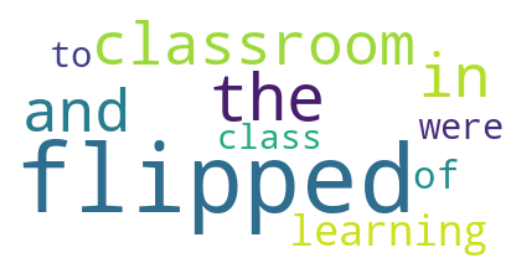

In [26]:
create_wordcloud(model, topic=16)

In [27]:
model.visualize_topics()

In [28]:
topics_to_include = list(range(1, 20))
model.visualize_barchart(topics= topics_to_include, width=300)

In [29]:
model.visualize_hierarchy()

In [30]:
hierarchical_topics = model.hierarchical_topics(docs)
model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 19/19 [00:00<00:00, 285.56it/s]


In [31]:
model.visualize_heatmap()

In [32]:
model.visualize_topics_over_time(topics_over_time, topics=[1, 3, 4, 5, 6, 7, 8, 9, 10])
#can innclude topics changing topics_over_time TO topics_over_time, topics=[x, y, z, etc.]

In [33]:
model.visualize_topics_over_time(topics_over_time, topics=[11, 12, 13, 14, 15, 16, 17, 18, 19])


In [34]:
model.visualize_topics_over_time(topics_over_time, topics=[])
#COVID-19 Topic
#meta studies

In [35]:
model.visualize_topics_over_time(topics_over_time)